In [1]:
import pandas as pd
df = pd.read_csv("covid19_day_wise.csv")
df.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [4]:
print("日期列表摘取：",df["Date"][:4])
print("日期-索引转换：\n",df[df["Date"] == "2020-02-03"])

日期列表摘取： 0    2020-01-22
1    2020-01-23
2    2020-01-24
3    2020-01-25
Name: Date, dtype: object
日期-索引转换：
           Date  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
12  2020-02-03      19887     426        604   18857       3100          64   

    New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
12            145                2.14                   3.04   

    Deaths / 100 Recovered  No. of countries  
12                   70.53                25  


In [7]:
confirmed0124 = df.loc[df["Date"] == "2020-01-24","Confirmed"]
print("截至1月24日的累积确诊数:",confirmed0124.values[0])

截至1月24日的累积确诊数: 941


In [8]:
result = df.loc[df["Date"] == "2020-07-23","New deaths"]
print("截至7月23日的新增死亡数:",result.values[0])

截至7月23日的新增死亡数: 9966


In [9]:
date = pd.to_datetime(df["Date"])
date_range = (date >= "2020-01-25") & (date <= "2020-07-22")
new_cases = df.loc[date_range,"New cases"]
overall = new_cases.sum()
print("共新增：",overall)

共新增： 15247802


In [12]:
confirmed = df.loc[:,"Confirmed"]
conf_0722 = confirmed.loc[df["Date"] == "2020-07-22"].values
conf_0125 = confirmed.loc[df["Date"] == "2020-01-25"].values
overall2 = conf_0722 - conf_0125
print("共新增：",overall2[0])

共新增： 15226291


In [13]:
confirmed = df["Confirmed"]
new_cases = df["New cases"]
idx_0722 = df.loc[df["Date"] == "2020-07-22"].index.item()
idx_0125 = df.loc[df["Date"] == "2020-01-25"].index.item()
for i in range(idx_0125,idx_0722+1):
    diff = new_cases[i] - (confirmed[i] - confirmed[i-1])
    if diff != 0:
        print("date index:",i,";差异:",diff)

date index: 62 ;差异: 15
date index: 81 ;差异: 21
date index: 87 ;差异: 1
date index: 91 ;差异: 2188
date index: 93 ;差异: 10034
date index: 95 ;差异: 1
date index: 97 ;差异: 105
date index: 98 ;差异: 2512
date index: 101 ;差异: 167
date index: 103 ;差异: 1
date index: 106 ;差异: 1583
date index: 107 ;差异: 1480
date index: 109 ;差异: 9
date index: 110 ;差异: 57
date index: 111 ;差异: 20
date index: 112 ;差异: 165
date index: 113 ;差异: 1
date index: 118 ;差异: 209
date index: 120 ;差异: 104
date index: 124 ;差异: 372
date index: 125 ;差异: 220
date index: 132 ;差异: 766
date index: 133 ;差异: 1
date index: 149 ;差异: 148
date index: 158 ;差异: 719
date index: 163 ;差异: 1
date index: 175 ;差异: 5
date index: 176 ;差异: 3
date index: 181 ;差异: 110


In [14]:
ratio = df["New cases"] / df["New recovered"]
print("比例样本:",ratio[:5])

比例样本: 0           NaN
1     49.500000
2     47.833333
3    164.333333
4     52.615385
dtype: float64


In [15]:
print(df.loc[0,"New cases"])
print(df.loc[0,"New recovered"])

0
0


In [16]:
not_zero_mask = df["New recovered"] != 0
ratio = df.loc[not_zero_mask,"New cases"] / df.loc[not_zero_mask,"New recovered"]
ratio_mean = ratio.mean()
ratio_std = ratio.std()
print("平均比例：", ratio_mean, "；标准差：", ratio_std)

平均比例： 7.049556348053241 ；标准差： 19.145284932105497


<Axes: >

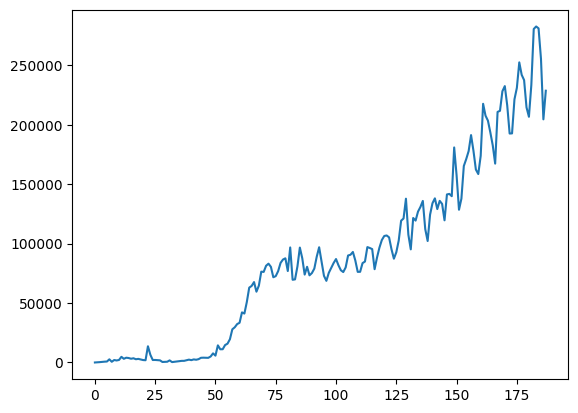

In [17]:
df["New cases"].plot()

In [18]:
print(df.loc[50,"Date"])

2020-03-12


<Axes: >

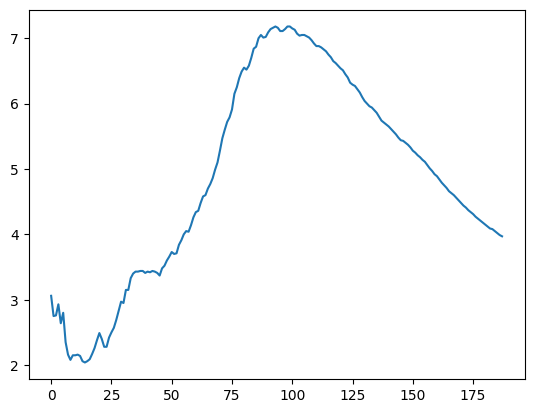

In [19]:
df["Deaths / 100 Cases"].plot()